Kernel:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


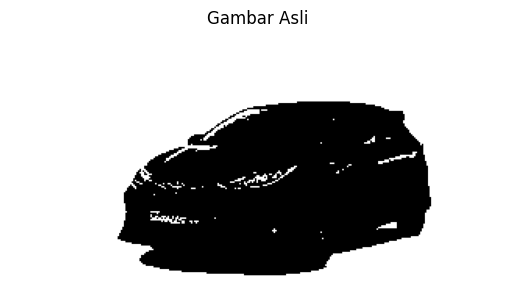

In [410]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dalam format grayscale
img = cv2.imread("image/mobil.JPEG", cv2.IMREAD_GRAYSCALE)

# Konversi ke gambar biner (hitam putih)
_, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
print ("Kernel:\n", kernel)

# Tampilkan hasil
plt.imshow(img_binary, cmap='gray')
plt.title('Gambar Asli')
plt.axis("off")
plt.show()


# Operasi Morfologi

## Morfologi Dasar


**1. Erotion (Erosi)**

Operasi yang "mengikis" batas objek foreground. Pixel bernilai 1 akan
 tetap 1 hanya jika semua pixel di bawah SE adalah 1

**2. Dilation (Dilasi)**

Opersi yang "memperbesar" objek foreground. Pixel bernilai 0 akan
 menjadi 1 jika setidaknya satu pixel di bawah SE adalah 1.

**3. Opening (Buka)**

Operasi morfologi yang menghilangkan objek kecil atau noise dari latar depan citra dengan cara melakukan erosi lalu diikuti dilasi.

**4. Closing (Tutup)**

Operasi yang mengisi lubang kecil atau noise pada objek dengan cara melakukan dilasi lalu diikuti erosi

In [421]:
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [422]:
# Visualisasi 
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [img, erosion, dilation, opening, closing]

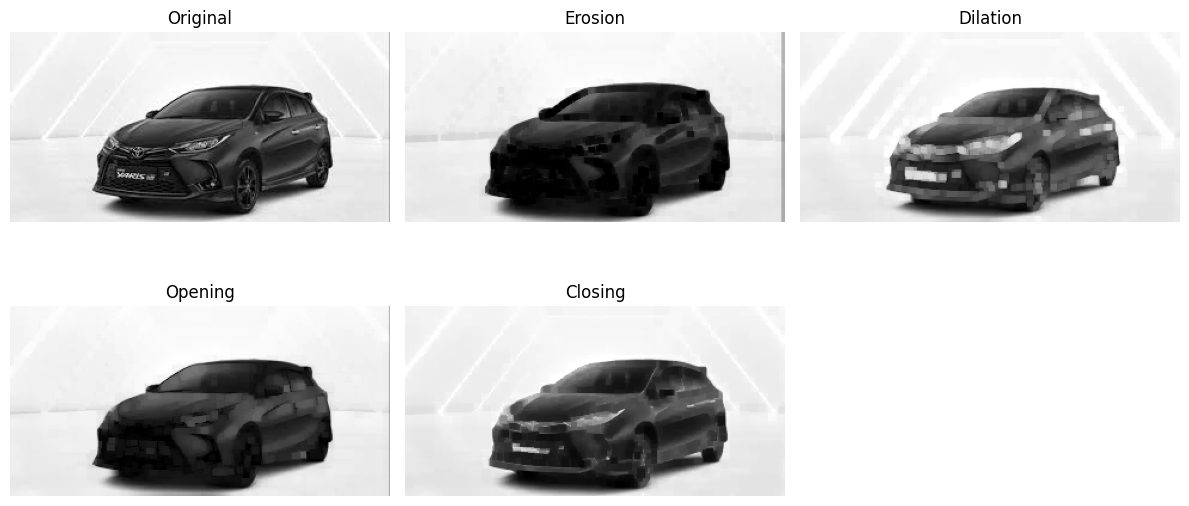

In [423]:
plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Morfologi Turunan

**1. Morphological Gradient**

Menyoroti batas atau tepi objek dalam citra. Area di sekitar tepi akan memiliki nilai piksel yang lebih tinggi.


**2. Top Hat**

Mengekstrak elemen kecil atau fitur yang lebih terang dari gambar, seperti detail halus yang lebih cerah dari sekitarnya. 


**3. Black Hat**

Menyorot area yang lebih gelap dari latar belakang, seperti objek atau detail yang lebih gelap dari sekitarnya. 

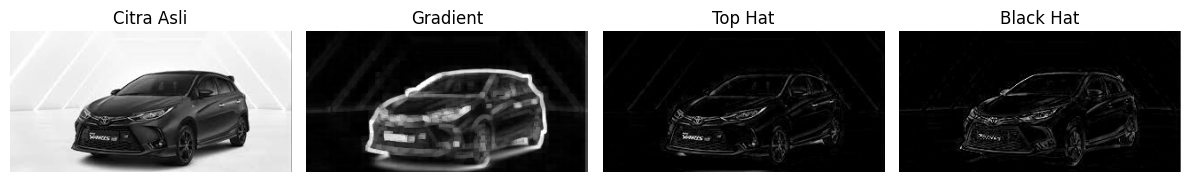

In [431]:
# Morphological Gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# Top Hat
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Black Hat
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Tampilkan hasil
titles = ['Citra Asli', 'Gradient', 'Top Hat', 'Black Hat']
images = [img, gradient, tophat, blackhat]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Contoh Aplikasi: Boundary Extraction

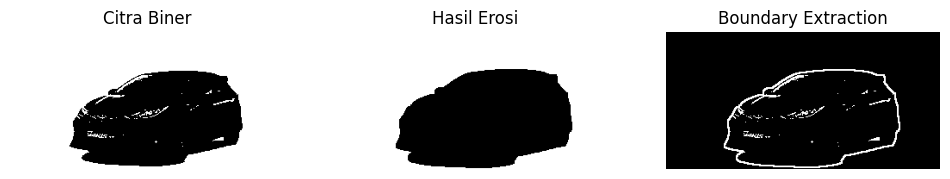

In [433]:
# Operasi Erosi
erosion = cv2.erode(img_binary, kernel, iterations=1)

# Boundary Extraction (Ekstraksi Batas)
boundary = cv2.subtract(img_binary, erosion)

# Tampilkan hasil
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_binary, cmap='gray')
plt.title("Citra Biner")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(erosion, cmap='gray')
plt.title("Hasil Erosi")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(boundary, cmap='gray')
plt.title("Boundary Extraction")
plt.axis("off")

plt.show()